In [2]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
xls = pd.ExcelFile('/content/EastWestAirlines.xlsx')
Airlines = pd.read_excel(xls, 'data')

In [4]:
Airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
Airlines.shape

(3999, 12)

In [6]:
(Airlines==0).all()

ID#                  False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [7]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#Count of duplicated rows
Airlines[Airlines.duplicated()].shape

(0, 12)

<Axes: >

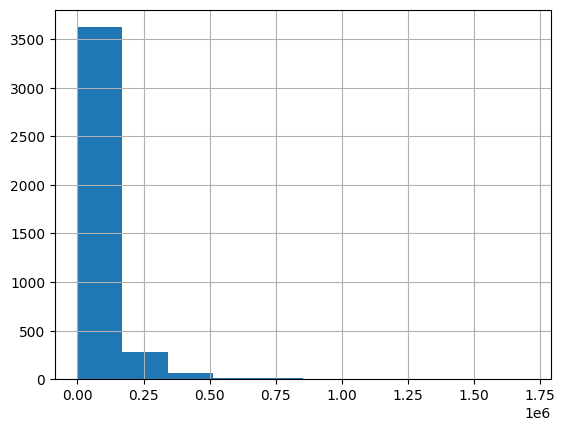

In [9]:
# histogram of Ozone
Airlines['Balance'].hist()

<Axes: >

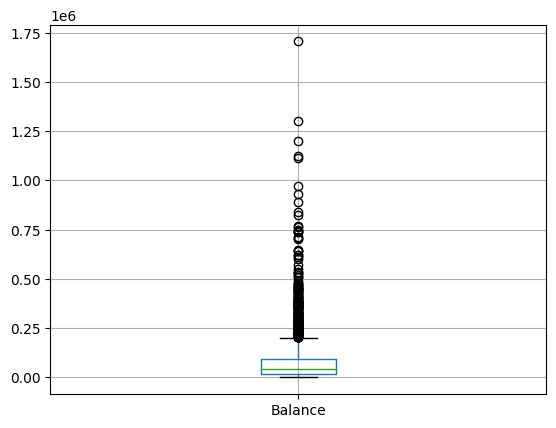

In [10]:
#Box plot
Airlines.boxplot(column=['Balance'])

In [11]:
Airlines["Balance"] = np.where(Airlines["Balance"] >0.25e+06, 4.309700e+04,Airlines['Balance'])

<Axes: >

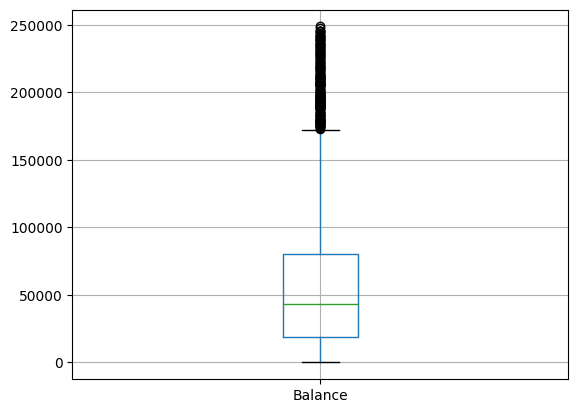

In [12]:
Airlines.boxplot(column=['Balance'])

In [13]:
outlier_indices = np.where(Airlines["Balance"] >150000)[0]
no_outliers = Airlines.drop(outlier_indices)

<Axes: >

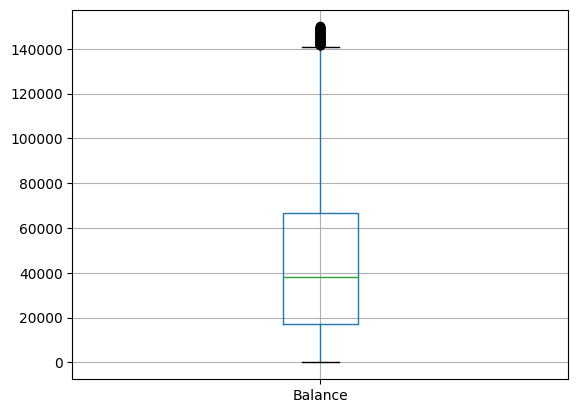

In [14]:
no_outliers.boxplot(column=['Balance'])

In [15]:
Airlines['Bonus_miles'].describe()

count      3999.000000
mean      17144.846212
std       24150.967826
min           0.000000
25%        1250.000000
50%        7171.000000
75%       23800.500000
max      263685.000000
Name: Bonus_miles, dtype: float64

In [16]:
no_outliers["Bonus_miles"] = np.where(no_outliers["Bonus_miles"] >140000, 17144.846212,no_outliers['Bonus_miles'])

<Axes: >

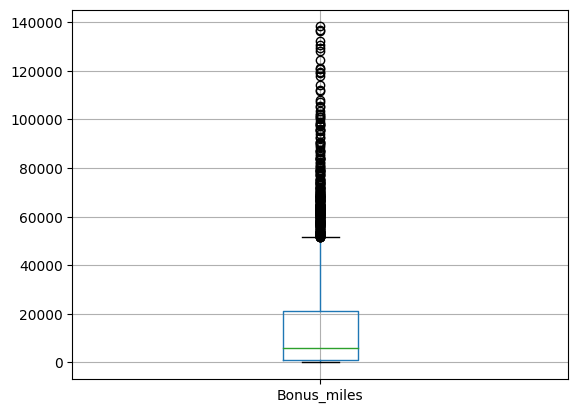

In [17]:
no_outliers.boxplot(column=['Bonus_miles'])

In [18]:
Airlines['Balance'].describe()

count      3999.000000
mean      57582.272068
std       52572.472895
min           0.000000
25%       18527.500000
50%       43097.000000
75%       80236.500000
max      248738.000000
Name: Balance, dtype: float64

In [19]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                3999 non-null   int64  
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   int64  
 3   cc1_miles          3999 non-null   int64  
 4   cc2_miles          3999 non-null   int64  
 5   cc3_miles          3999 non-null   int64  
 6   Bonus_miles        3999 non-null   int64  
 7   Bonus_trans        3999 non-null   int64  
 8   Flight_miles_12mo  3999 non-null   int64  
 9   Flight_trans_12    3999 non-null   int64  
 10  Days_since_enroll  3999 non-null   int64  
 11  Award?             3999 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 375.0 KB


<Axes: >

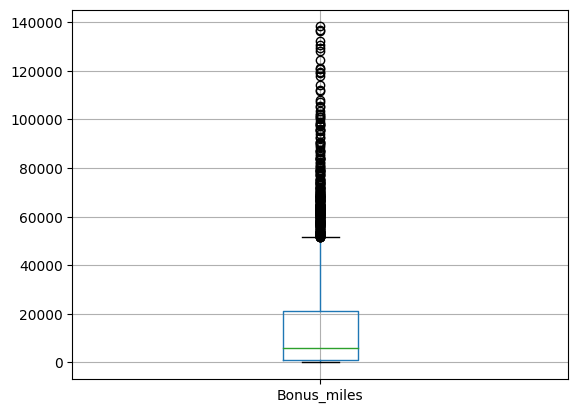

In [20]:
#Box plot
no_outliers.boxplot(column=['Bonus_miles'])

In [21]:
Airlines['Balance'].describe()

count      3999.000000
mean      57582.272068
std       52572.472895
min           0.000000
25%       18527.500000
50%       43097.000000
75%       80236.500000
max      248738.000000
Name: Balance, dtype: float64

<Axes: >

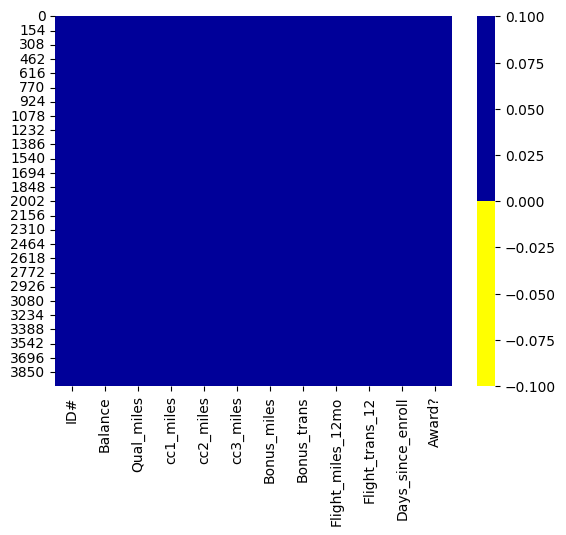

In [22]:
import seaborn as sns
cols = Airlines.columns
colours = ['#ffff00','#000099' ] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(Airlines[cols].isnull(),
            cmap=sns.color_palette(colours))

In [23]:
(Airlines==0).all()

ID#                  False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [24]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:,1:])

In [26]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.113143,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.077367,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.166255,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.059404,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.392992,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# **Hierarchical Clustering**

In [27]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [28]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

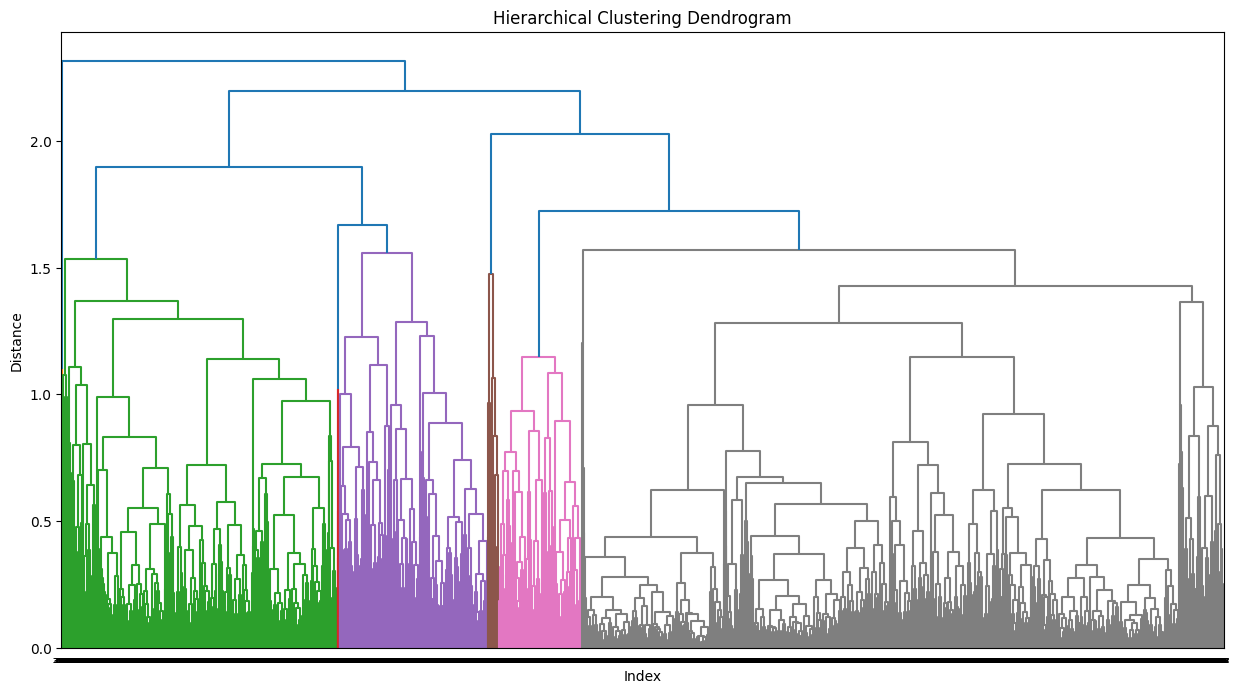

In [29]:
#dendogram
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 )
plt.show()

In [30]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [31]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [32]:
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [33]:
df_norm['h_clusterid'] = hc.labels_

In [34]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.113143,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.077367,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.166255,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.059404,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.392992,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.074279,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,1
3995,0.258847,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,1
3996,0.295882,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,1
3997,0.220710,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [35]:
#Airlines['cluster_id']=hc.labels_

In [36]:
#Airlines

# **DBSCAN**

In [37]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.113143,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.077367,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.166255,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.059404,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.392992,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1


In [39]:
airlines1=df_norm

In [40]:
df_norm.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"], axis=1,inplace = True)
df_norm.columns

Index(['Balance', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
       'Bonus_trans', 'Days_since_enroll', 'Award?', 'h_clusterid'],
      dtype='object')

In [41]:
array=df_norm.values

In [42]:
array

array([[0.11314315, 0.        , 0.        , ..., 0.84374246, 0.        ,
        0.        ],
       [0.07736655, 0.        , 0.        , ..., 0.83988425, 0.        ,
        0.        ],
       [0.16625526, 0.        , 0.        , ..., 0.84784181, 0.        ,
        0.        ],
       ...,
       [0.29588161, 0.5       , 0.        , ..., 0.16879672, 1.        ,
        1.        ],
       [0.22071014, 0.        , 0.        , ..., 0.16867615, 0.        ,
        0.        ],
       [0.01212521, 0.        , 0.        , ..., 0.16831444, 0.        ,
        0.        ]])

In [43]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(df_norm)

DBSCAN(eps=0.8, min_samples=6)

In [44]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [46]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [47]:
pd.concat([df_norm,cl],axis=1)

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,h_clusterid,cluster
0,0.113143,0.00,0.0,0.0,0.000660,0.011628,0.843742,0.0,0,0
1,0.077367,0.00,0.0,0.0,0.000815,0.023256,0.839884,0.0,0,0
2,0.166255,0.00,0.0,0.0,0.015636,0.046512,0.847842,0.0,0,0
3,0.059404,0.00,0.0,0.0,0.001896,0.011628,0.837955,0.0,0,0
4,0.392992,0.75,0.0,0.0,0.164211,0.302326,0.835905,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
3994,0.074279,0.00,0.0,0.0,0.032330,0.046512,0.168917,1.0,1,1
3995,0.258847,0.00,0.0,0.0,0.003720,0.058140,0.167953,1.0,1,1
3996,0.295882,0.50,0.0,0.0,0.096505,0.093023,0.168797,1.0,1,1
3997,0.220710,0.00,0.0,0.0,0.001896,0.011628,0.168676,0.0,0,0


# **K-Means**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

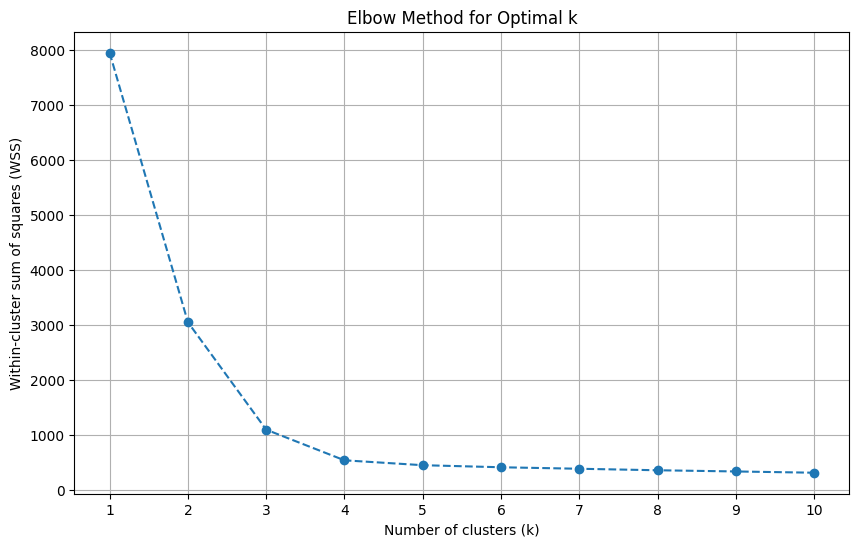

In [55]:
wss = []
num_clusters = range(1, 11)  # Testing up to 10 clusters

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_norm.iloc[:, :])
    wss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wss, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(num_clusters)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


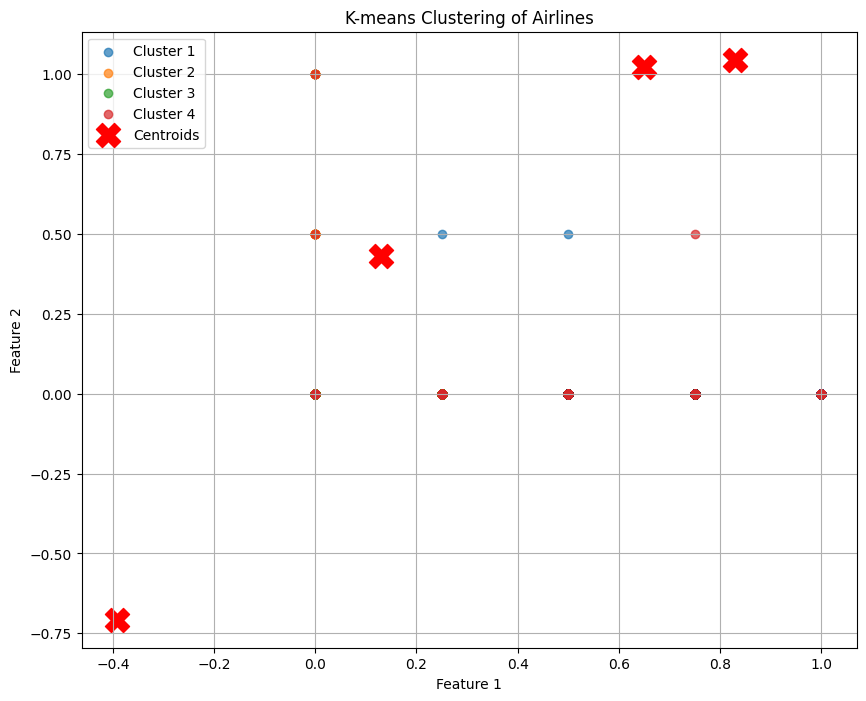

In [59]:
X = df_norm.iloc[:, :].values  # Assuming first column is non-numeric or an identifier

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Assign cluster labels to the original dataframe
df_norm['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
for cluster_num in range(k):
    cluster_data = df_norm[df_norm['cluster'] == cluster_num]
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {cluster_num+1}', alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering of Airlines')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
